In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('AssignmentData.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,0,2018-01-01 00:00:00,803.22270,10.458000,10.458000,0.955500,8.946000,0.0000,0.0000,2018-01-01
1,1,2018-01-01 00:15:00,774.89523,10.326750,10.326750,0.961625,8.911875,0.0000,0.0000,2018-01-01
2,2,2018-01-01 00:30:00,731.46927,10.195500,10.195500,0.967750,8.877750,0.0000,0.0000,2018-01-01
3,3,2018-01-01 00:45:00,713.93870,10.064250,10.064250,0.973875,8.843625,0.0000,0.0000,2018-01-01
4,4,2018-01-01 01:00:00,699.23007,9.933000,9.933000,0.980000,8.809500,0.0000,0.0000,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
103579,103579,2020-12-14 22:45:00,NaN,12.450375,12.450375,0.611625,4.087125,1.9110,0.0000,2020-12-14
103580,103580,2020-12-14 23:00:00,NaN,12.285000,12.285000,0.619500,4.084500,1.8795,0.0000,2020-12-14
103581,103581,2020-12-14 23:15:00,NaN,13.650000,13.650000,0.829500,8.589000,2.4675,0.8925,2020-12-14
103582,103582,2020-12-14 23:30:00,NaN,13.650000,13.650000,0.829500,8.610000,2.4150,0.8925,2020-12-14


In [3]:
df.dtypes

Unnamed: 0                int64
datetime                 object
load                    float64
apparent_temperature    float64
temperature             float64
humidity                float64
dew_point               float64
wind_speed              float64
cloud_cover             float64
date                     object
dtype: object

In [4]:
df['Time'] = pd.to_datetime(df['datetime']).dt.time
df.head()

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time
0,0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,00:00:00
1,1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,00:15:00
2,2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,00:30:00
3,3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,00:45:00
4,4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,01:00:00


In [5]:
df=df.drop(["Unnamed: 0"],axis=1)

In [6]:
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,00:00:00
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,00:15:00
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,00:30:00
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,00:45:00
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,01:00:00


In [7]:
df['datetime']=df['datetime'].astype('datetime64[ns]')

In [8]:
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month_name(locale='English')
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,00:00:00,2018,January
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,00:15:00,2018,January
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,00:30:00,2018,January
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,00:45:00,2018,January
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,01:00:00,2018,January


In [9]:
labelencoder=LabelEncoder()
df['Time']=labelencoder.fit_transform(df['Time'])
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,0,2018,January
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,1,2018,January
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,2,2018,January
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,3,2018,January
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,4,2018,January


In [10]:
df['weekday']=df['datetime'].dt.day_name()
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,0,2018,January,Monday
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,1,2018,January,Monday
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,2,2018,January,Monday
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,3,2018,January,Monday
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,4,2018,January,Monday


<function matplotlib.pyplot.show(close=None, block=None)>

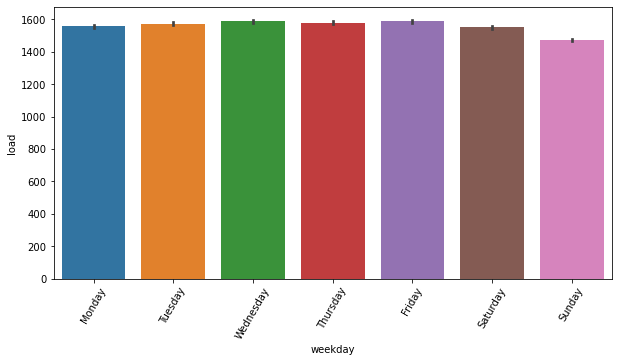

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['weekday'],y=df['load'])
plt.xlabel='Days'
plt.xticks(rotation=60)
plt.ylabel='Load'
plt.show

If we look at the above plot we can see that on Sundays the load is less compared to other days. After Sundays, its on Saturdays the load is less. It could be because on Saturdays and Sundays most of the corporative offices are not functioning. Also we can see that there is no linear relation between load and days.

<function matplotlib.pyplot.show(close=None, block=None)>

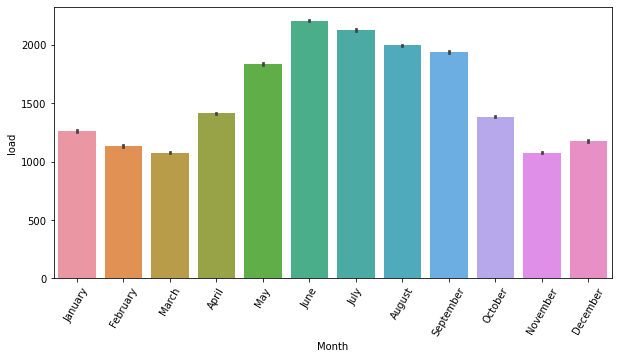

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Month'],y=df['load'])
plt.xlabel='Month'
plt.xticks(rotation=60)
plt.ylabel='Load'
plt.show

Here also we can't find any linear relationship between the load and months. 
In my opinion, We can interpret the relation based on two things:
1. Based on climate
2. Based on festivals and other factors

Based on climate,

We can observe that during June the load is very high. We can interpret that, in north India summer is from April to June and because of that the load is gradually increasing from during this period. And then comes the monsoon from July to September, because of that the load is gradually decreasing. During March it is the winter and on that time the load is very less.

Based on festivals and other factors,

By 'other factor' I meant functioning of schools and colleges. On June every educational institutions start functioning. From October the festivals start like Diwali and all, during that time most of the educational institutions will not be functioning.

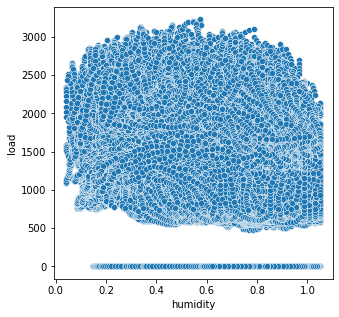

In [95]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['humidity'],y=df['load'])
plt.xlabel='Humidity'
plt.ylabel='Load'
plt.show()

We can't find any linear relationship in this scatter plot. We can transform the humidity and again plot it to check for any relationship. If we don't find any relation then we can essentialy drop the humidity feature from the dataset.

<BarContainer object of 99 artists>

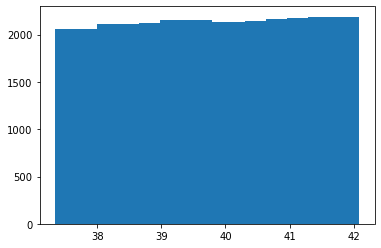

In [13]:
bins=np.linspace(df.temperature.quantile(0.02),df.temperature.quantile(0.98),100)
c=np.digitize(df.temperature,bins)
plt.bar(bins[:-1],[np.mean(df.load.values[c==i]) for i in range(1,len(bins))])

<BarContainer object of 99 artists>

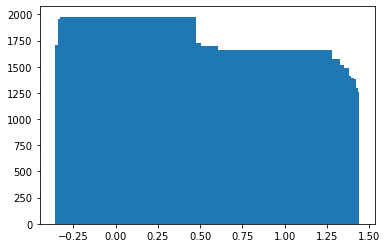

In [96]:
bins=np.linspace(df.humidity.min(),df.humidity.max(),100)
c=np.digitize(df.humidity,bins)
plt.bar(bins[:-1],[np.mean(df.load.values[c==i]) for i in range(1,len(bins))])

<BarContainer object of 99 artists>

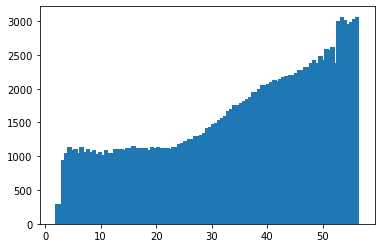

In [97]:
bins=np.linspace(df.apparent_temperature.min(),df.apparent_temperature.max(),100)
c=np.digitize(df.apparent_temperature,bins)
plt.bar(bins[:-1],[np.mean(df.load.values[c==i]) for i in range(1,len(bins))])

Here we can see that the load and apparent temperature is connected.

In [16]:
labelencoder=LabelEncoder()
df['Month']=labelencoder.fit_transform(df['Month'])

In [19]:
labelencoder=LabelEncoder()
df['weekday']=labelencoder.fit_transform(df['weekday'])

In [20]:
df['Time']=df['Time'].astype(int)
df['date']=df['date'].astype(object)

In [21]:
df.dtypes

datetime                datetime64[ns]
load                           float64
apparent_temperature           float64
temperature                    float64
humidity                       float64
dew_point                      float64
wind_speed                     float64
cloud_cover                    float64
date                            object
Time                             int32
Year                             int64
Month                            int32
weekday                          int32
dtype: object

In [22]:
pd.options.display.float_format='{:,.2f}'.format

Since this problem is a supervised regeression problem, I'm going to check the correlation between the features. So that i can drop some features if required based on the correlation.
The above code I used to make the correlation table to be look more appealing.

In [23]:
df.corr()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,Time,Year,Month,weekday
load,1.00,0.74,0.68,-0.09,0.59,0.22,0.27,0.19,-0.10,0.04,0.01
apparent_temperature,0.74,1.00,0.96,-0.31,0.65,0.32,0.26,0.21,0.02,0.10,0.01
temperature,0.68,0.96,1.00,-0.50,0.49,0.34,0.15,0.23,0.02,0.15,0.01
humidity,-0.09,-0.31,-0.50,1.00,0.47,-0.23,0.33,-0.29,-0.14,-0.07,-0.01
dew_point,0.59,0.65,0.49,0.47,1.00,0.10,0.47,-0.04,-0.10,0.09,0.00
wind_speed,0.22,0.32,0.34,-0.23,0.10,1.00,0.11,0.15,0.07,-0.07,-0.04
cloud_cover,0.27,0.26,0.15,0.33,0.47,0.11,1.00,0.05,0.03,-0.11,0.05
Time,0.19,0.21,0.23,-0.29,-0.04,0.15,0.05,1.00,-0.00,0.00,-0.00
Year,-0.10,0.02,0.02,-0.14,-0.10,0.07,0.03,-0.00,1.00,0.02,-0.00
Month,0.04,0.10,0.15,-0.07,0.09,-0.07,-0.11,0.00,0.02,1.00,0.00


When we look at this correlation table we can understand that the humidity feature is less correlated with the load feature(dependent feature). So we can remove that feature from the training data.

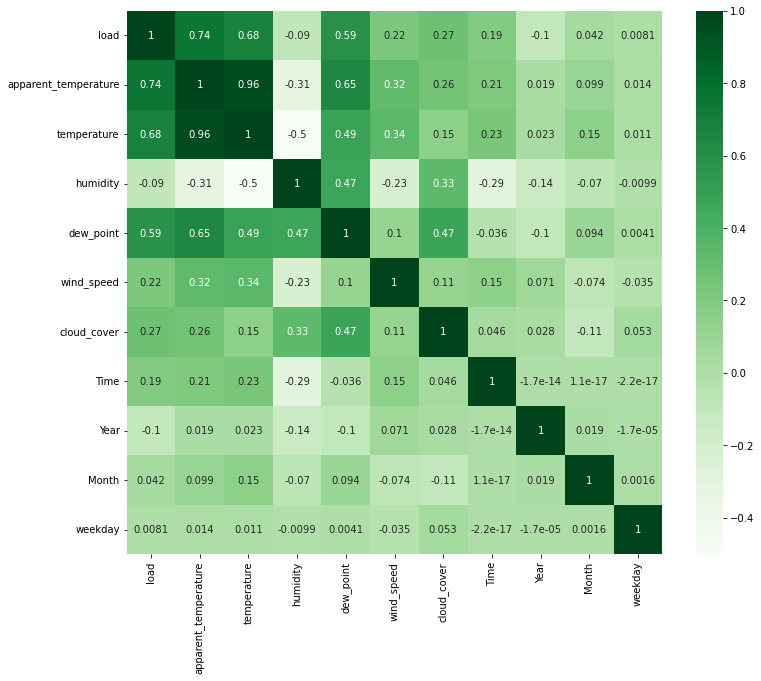

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Greens)
plt.show()

It shows the heatmap of the correlation table.

Even though the humidity feature can be removed, I prefer to keep it since the dataset is not that big. 

In [25]:
labelencoder=LabelEncoder()
df['date']=labelencoder.fit_transform(df['date'])

In [26]:
df.isnull()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103579,False,True,False,False,False,False,False,False,False,False,False,False,False
103580,False,True,False,False,False,False,False,False,False,False,False,False,False
103581,False,True,False,False,False,False,False,False,False,False,False,False,False
103582,False,True,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df['load'].fillna(0,inplace=True)

In [28]:
df

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
0,2018-01-01 00:00:00,803.22,10.46,10.46,0.96,8.95,0.00,0.00,0,0,2018,4,1
1,2018-01-01 00:15:00,774.90,10.33,10.33,0.96,8.91,0.00,0.00,0,1,2018,4,1
2,2018-01-01 00:30:00,731.47,10.20,10.20,0.97,8.88,0.00,0.00,0,2,2018,4,1
3,2018-01-01 00:45:00,713.94,10.06,10.06,0.97,8.84,0.00,0.00,0,3,2018,4,1
4,2018-01-01 01:00:00,699.23,9.93,9.93,0.98,8.81,0.00,0.00,0,4,2018,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103579,2020-12-14 22:45:00,0.00,12.45,12.45,0.61,4.09,1.91,0.00,1078,91,2020,2,1
103580,2020-12-14 23:00:00,0.00,12.29,12.29,0.62,4.08,1.88,0.00,1078,92,2020,2,1
103581,2020-12-14 23:15:00,0.00,13.65,13.65,0.83,8.59,2.47,0.89,1078,93,2020,2,1
103582,2020-12-14 23:30:00,0.00,13.65,13.65,0.83,8.61,2.42,0.89,1078,94,2020,2,1


In [ ]:
pred

In [29]:
df=df.set_index('datetime')
df.head()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
datetime,,,,,,,,,,,,
2018-01-01 00:00:00,803.22,10.46,10.46,0.96,8.95,0.00,0.00,0,0,2018,4,1
2018-01-01 00:15:00,774.90,10.33,10.33,0.96,8.91,0.00,0.00,0,1,2018,4,1
2018-01-01 00:30:00,731.47,10.20,10.20,0.97,8.88,0.00,0.00,0,2,2018,4,1
2018-01-01 00:45:00,713.94,10.06,10.06,0.97,8.84,0.00,0.00,0,3,2018,4,1
2018-01-01 01:00:00,699.23,9.93,9.93,0.98,8.81,0.00,0.00,0,4,2018,4,1


## Splitting the dataset into test and train data

In [30]:
# We have to take till 12 December 2020 data for tran and test

dataset=df.iloc[:-(2*96),:] #data till 12 Dec 2020
truetest=df.iloc[-(2*96):,:] #dataset for which load to predict

In [31]:
train=dataset.iloc[:-(30*96),:] #dataset for train
test=dataset.iloc[-(30*96):,:] #dataset for test

In [32]:
# splitting the train data into dependent and independent 

X_train=train.drop('load',axis=1)
y_train=train['load']

In [33]:
# splitting the test data into dependent and independent

X_test=test.drop('load',axis=1)
y_test=test['load']

In [94]:
train

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
datetime,,,,,,,,,,,,
2018-01-01 00:00:00,803.22,10.46,10.46,0.96,8.95,0.00,0.00,0,0,2018,4,1
2018-01-01 00:15:00,774.90,10.33,10.33,0.96,8.91,0.00,0.00,0,1,2018,4,1
2018-01-01 00:30:00,731.47,10.20,10.20,0.97,8.88,0.00,0.00,0,2,2018,4,1
2018-01-01 00:45:00,713.94,10.06,10.06,0.97,8.84,0.00,0.00,0,3,2018,4,1
2018-01-01 01:00:00,699.23,9.93,9.93,0.98,8.81,0.00,0.00,0,4,2018,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 22:45:00,948.39,20.61,20.61,0.44,6.42,0.57,0.01,1046,91,2020,9,4
2020-11-12 23:00:00,915.06,20.46,20.46,0.44,6.43,0.59,0.00,1046,92,2020,9,4
2020-11-12 23:15:00,890.82,19.95,19.95,0.40,8.33,1.63,0.66,1046,93,2020,9,4


## Linear regression

In [98]:
reg=LinearRegression()

In [99]:
reg.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred=reg.predict(X_test)

In [101]:
R2_score_lr=r2_score(y_test,y_pred)
print(R2_score_lr)

0.2597767145936488


In [102]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 196.49704741694288


In [104]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 55360.20577270641


## Random Forest Regeression

In [105]:
reg=RandomForestRegressor()

In [106]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
y_pred=reg.predict(X_test)

In [108]:
y_pred

array([725.9678303, 714.6973413, 688.4342305, ..., 811.9705322,
       787.0087256, 770.510921 ])

In [109]:
R2_score_rf=r2_score(y_test,y_pred)
print(R2_score_rf)

0.8739632636910338


In [110]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 69.1344321511458


In [111]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 9426.101278554615


## XG Boost

In [112]:
xg_boost=XGBRegressor()

In [113]:
xg_boost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [114]:
y_pred=xg_boost.predict(X_test)

In [115]:
R2_score_xg=r2_score(y_test,y_pred)
print(R2_score_xg)

0.8938271764349205


In [116]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 70.35666786679417


In [117]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 7940.50859505915


## Gradient Boost

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
gbr=GradientBoostingRegressor()

In [120]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [121]:
y_pred=gbr.predict(X_test)

In [122]:
R2_score_gbr=r2_score(y_test,y_pred)
print(R2_score_gbr)

0.7982478787872418


In [123]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 101.88729047562293


In [124]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 15088.743039591052


## Evaluation and comparison of models

In [56]:
model=pd.DataFrame({'Models':['Linear Regression','Random Forest','XGBoost','Gradient Boost'],
                    'R-squared_score':[R2_score_lr*100,R2_score_rf*100,R2_score_xg*100,R2_score_gbr*100]})
model.sort_values(by='R-squared_score',ascending=False)

,Models,R-squared_score
2,XGBoost,89.38
1,Random Forest,87.24
3,Gradient Boost,79.82
0,Linear Regression,25.98


From the above table, we can see that the XGBoost model is showing the greatest R-squared score. Hence lets use the XGBoost regression algorithm to predict the load for the desired date.

In [57]:
X_true=truetest.drop('load',axis=1)
y_true=truetest['load']

In [58]:
X_true

,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,Time,Year,Month,weekday
datetime,,,,,,,,,,,
2020-12-13 00:00:00,16.88,16.88,0.77,11.72,2.44,0.02,1077,0,2020,2,3
2020-12-13 00:15:00,16.72,16.72,0.76,11.53,2.53,0.02,1077,1,2020,2,3
2020-12-13 00:30:00,16.56,16.56,0.76,11.35,2.63,0.01,1077,2,2020,2,3
2020-12-13 00:45:00,16.40,16.40,0.76,11.16,2.73,0.01,1077,3,2020,2,3
2020-12-13 01:00:00,16.23,16.23,0.76,10.97,2.82,0.00,1077,4,2020,2,3
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14 22:45:00,12.45,12.45,0.61,4.09,1.91,0.00,1078,91,2020,2,1
2020-12-14 23:00:00,12.29,12.29,0.62,4.08,1.88,0.00,1078,92,2020,2,1
2020-12-14 23:15:00,13.65,13.65,0.83,8.59,2.47,0.89,1078,93,2020,2,1


## Predicting use the XGBoost

In [60]:
y_pred_true=xg_boost.predict(X_true)

In [74]:
final=pd.DataFrame(y_true)
final.reset_index(level=0,inplace=True)


In [75]:
pred=pd.DataFrame(y_pred_true)


In [76]:
final['load']=pred[0]

In [77]:
final

,datetime,load
0,2020-12-13 00:00:00,741.73
1,2020-12-13 00:15:00,727.80
2,2020-12-13 00:30:00,711.00
3,2020-12-13 00:45:00,647.36
4,2020-12-13 01:00:00,628.75
...,...,...
187,2020-12-14 22:45:00,"1,058.44"
188,2020-12-14 23:00:00,"1,022.93"
189,2020-12-14 23:15:00,828.52
190,2020-12-14 23:30:00,793.96


In [78]:
final.rename(columns={'load':'forcast'},inplace=True)

In [79]:
final.to_csv('FinalData.csv')